In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_excel("DengueData2022.xlsx")

In [6]:
# Assuming 80% of the data is used for training
train_size = int(len(data) * 0.86)
train_data = data[:train_size]
test_data = data[train_size:]

In [7]:
def train_arima_model(train_data, order):
    model = ARIMA(train_data['Affected'], order=order)
    model_fit = model.fit()
    return model_fit

In [10]:
arima_orders = [(p, d, q) for p in range(3) for d in range(1) for q in range(3)]

In [55]:
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 2: Load the dataset
df = pd.read_excel('DengueData2022.xlsx')

# # Step 3: Preprocess the data
# df['Day'] = pd.to_datetime(df['Day'])
# df.set_index('Day', inplace=False)

# Step 4: Split the data
train_size = int(len(df) * 0.8)  # Adjust the percentage as needed
train_data = df[:train_size]
test_data = df[train_size:]

# Step 5: Create a wrapper class for ARIMA
class ARIMAModel(BaseEstimator, RegressorMixin):
    def __init__(self, order):
        super().__init__()
        self.order = order

    def fit(self, X, y=None):
        self.model = ARIMA(X, order=self.order)
        self.model_fit = self.model.fit()

    def predict(self, X):
        return self.model_fit.forecast(len(X))[0]

# Step 6: Build the AdaBoost model with ARIMA
base_estimator = ARIMAModel(order=(1, 0, 1))  # Adjust ARIMA order as needed
adaboost_model = BaggingRegressor(base_estimator=base_estimator)
adaboost_model.fit(train_data['Day'], train_data['Affected'])  # Updated line

# Step 7: Evaluate the model
predictions = adaboost_model.predict(test_data.drop(columns=['Affected']))
mse = mean_squared_error(test_data['Affected'], predictions)
rmse = mse**0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")


ValueError: Expected 2D array, got 1D array instead:
array=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [52]:
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 2: Load the dataset
df = pd.read_excel('DengueData2022.xlsx')

# Step 3: Preprocess the data
df['Day'] = pd.to_datetime(df['Day'])
df.set_index('Day', inplace=False)

# Step 4: Split the data
train_size = int(len(df) * 0.8)  # Adjust the percentage as needed
train_data = df[:train_size]
test_data = df[train_size:]

# Step 5: Build the AdaBoost with ARIMA model
base_estimator = ARIMA(train_data['Affected'], order=(1, 0, 1))  # Adjust ARIMA order as needed
adaboost_model = BaggingRegressor(base_estimator=base_estimator)
adaboost_model.fit(train_data.drop(columns=['Affected']), train_data['Affected'])  # Updated line

# Step 6: Evaluate the model
predictions = adaboost_model.predict(test_data.drop(columns=['Affected']))
mse = mean_squared_error(test_data['Affected'], predictions)
rmse = mse**0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")


e:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
e:\Installation\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be re

TypeError: Cannot clone object '<statsmodels.tsa.arima_model.ARMA object at 0x0000026A937A3340>' (type <class 'statsmodels.tsa.arima_model.ARMA'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [68]:
import pandas as pd

# Load data from Excel
df = pd.read_excel('DengueData2022.xlsx')

# Ensure the 'Day' column is treated as a datetime type
df['Day'] = pd.to_datetime(df['Day'])
df.set_index('Day', inplace=False)


,Affected
Day,
1970-01-01 00:00:00.000000001,9
1970-01-01 00:00:00.000000002,19
1970-01-01 00:00:00.000000003,16
1970-01-01 00:00:00.000000004,13
1970-01-01 00:00:00.000000005,14
...,...
1970-01-01 00:00:00.000000148,481
1970-01-01 00:00:00.000000149,618
1970-01-01 00:00:00.000000150,545


In [69]:
from statsmodels.tsa.arima_model import ARIMA

def fit_arima_model(data):
    # Replace 'p', 'd', and 'q' with appropriate values
    model = ARIMA(data, order=(p, d, q))
    model_fit = model.fit(disp=0)
    return model_fit


In [70]:
window_size = 30  # Adjust this based on your dataset
samples = [df[i:i+window_size] for i in range(len(df) - window_size + 1)]


In [78]:
from sklearn.ensemble import BaggingRegressor

# Create a Bagging Regressor with ARIMA models
bagging_arima = BaggingRegressor(base_estimator=fit_arima_model, n_estimators=10, random_state=0)

# Fit the Bagging Regressor to your samples
bagging_arima.fit


TypeError: list indices must be integers or slices, not str

In [83]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import BaggingRegressor

# Load the dataset from Excel
df = pd.read_excel('DengueData2022.xlsx')

# Set 'Day' column as the index
df.set_index('Day', inplace=True)

# Convert the index to DateTime if it's not already in DateTime format
df.index = pd.to_datetime(df.index)

# Prepare the features and target variables
# Convert the index to a numpy array
X = df.index.to_numpy()

# Reshape X to have two dimensions
X = np.reshape(X, (-1, 1))
y = df['Affected']

# Define the ARIMA model
arima_model = ARIMA(y, order=(1,0,1))  # Replace p, d, q with appropriate ARIMA parameters

# Define the bagging regressor
bagging_regressor = BaggingRegressor(base_estimator=arima_model, n_estimators=10)  # Replace n with the number of estimators

# Fit the bagging regressor
bagging_regressor.fit(df, y)


e:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  warnings.warn('No frequency information was'
e:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  warnings.warn('No frequency information was'
e:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  warnings.warn('No frequency information was'
e:\Installation\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TypeError: Cannot clone object '<statsmodels.tsa.arima.model.ARIMA object at 0x0000026A9377FBE0>' (type <class 'statsmodels.tsa.arima.model.ARIMA'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [84]:
import pandas as pd

# Load the data from the Excel file
data = pd.read_excel("DengueData2022.xlsx")

# Ensure the 'Day' column is recognized as a datetime type
data['Day'] = pd.to_datetime(data['Day'])

# Set the 'Day' column as the index
data.set_index('Day', inplace=True)

# Sort the data by the index (date)
data.sort_index(inplace=True)


e:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
e:\Installation\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency N wil

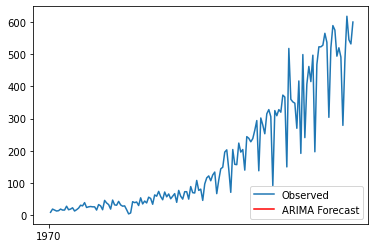

In [92]:
from statsmodels.tsa.arima_model import ARIMA

# Fit an ARIMA model
arima_model = ARIMA(data['Affected'], order=(1, 0, 1))  # Replace p, d, q with your choice of order
arima_result = arima_model.fit()

# Generate ARIMA forecasts
arima_forecasts,_,_ = arima_result.forecast()  # Replace number_of_steps with how many steps you want to forecast

# You can plot the forecasts
import matplotlib.pyplot as plt

plt.plot(data['Affected'], label='Observed')
plt.plot(arima_forecasts, color='red', label='ARIMA Forecast')
plt.legend()
plt.show()


In [101]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Calculate the residuals between actual values and ARIMA forecasts
arima_residuals = data['Affected'] - arima_forecasts

# Create lag features
data['Residual_Lag1'] = arima_residuals.shift(1)
data.dropna(inplace=True)  # Drop rows with NaN due to shifting

# Split data into features and target
X = data[['Affected']]
y = arima_residuals[1:]  # We drop the first row to align with X after lagging

# Split data into training and testing
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Create an AdaBoost model with DecisionTreeRegressor as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=3)
adaboost_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, learning_rate=0.1)

# Train the AdaBoost model on residuals
adaboost_model.fit(X_train, y_train)

# Make predictions
adaboost_predictions = adaboost_model.predict(X_test)


e:\Installation\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [102]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, adaboost_predictions)  # or adaboost_predictions

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')


MSE: 1557.95
RMSE: 39.47


In [93]:
arima_forecasts

array([531.8754579])

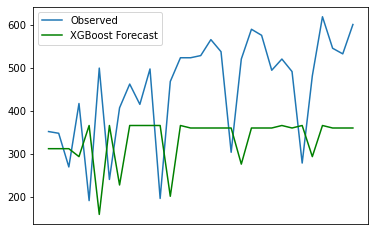

In [94]:
import xgboost as xgb
from xgboost import plot_importance
import numpy as np

# Create lag features
data['Affected_Lag1'] = data['Affected'].shift(1)
data.dropna(inplace=True)  # Drop rows with NaN due to shifting

# Split data into features and target
X = data[['Affected_Lag1']]
y = data['Affected']

# Split data into training and testing
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost hyperparameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# Make predictions
xgb_predictions = xgb_model.predict(dtest)

# You can plot the XGBoost predictions
plt.plot(y_test.index, y_test.values, label='Observed')
plt.plot(y_test.index, xgb_predictions, color='green', label='XGBoost Forecast')
plt.legend()
plt.show()
